# Algoritmo: Agrupamento perfis de velocidades
## Autor: Antônio Claudio Dutra Batista
## Orientador: Francisco Moraes de Oliveria Neto
## Metodologia: Agupamento de perfis de velocidades com consideração do tempo
''' Os dados são de velocidade obtidas pela extração de informações do sistema de localização geografrica de veiculos em operação em um trecho de estudo e para tal situação se deseja identificar os perfis de velocidades veicular semelhantes '''

# 1.0 Preparando dados para manipulação

In [5]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
 
# Trazendo bases com dados de velocidades dos veiculos no trecho em estudo
df1 = pd.read_excel('perfil01.xlsx')
df2 = pd.read_excel('perfil02.xlsx')
df3 = pd.read_excel('perfil03.xlsx')
df4 = pd.read_excel('perfil04.xlsx')
# df5 = pd.read_excel()
# df6 = pd.read_excel()
# df7 = pd.read_excel()
# df8 = pd.read_excel()
# df10 = pd.read_excel()

In [6]:
# Concatenando os dataframes
df_concatenado = pd.concat([df1['velocidade'], df2['velocidade'], df3['velocidade'], df4['velocidade']], axis=1)
df_concatenado.columns = ['velocidade_df1', 'velocidade_df2', 'velocidade_df3', 'velocidade_df4']

In [7]:
# Removendo os nulos 
df_concatenado.dropna(inplace=True)

In [8]:
# Transpondo o DataFrame para que as colunas representem instâncias
df_transposto = df_concatenado.T

In [9]:
# Normalização das velocidades
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(df_transposto)

In [10]:
df_normalizado

array([[-1.29141569, -0.77992119, -0.57735027, -0.53214917, -0.010779  ,
        -0.07084277, -1.12789224, -1.63386154,  0.89066616,  1.73151371,
        -1.51715566, -1.37718519, -0.66490041,  0.56283405, -0.78158655],
       [-0.11840101, -0.84443495, -0.57735027, -0.08639342,  0.41978168,
        -1.01388071, -0.86297062,  0.81776419,  0.97754473, -0.61723406,
        -0.18068952,  1.40402603,  1.72949948, -0.61207219,  1.4963366 ],
       [ 1.51867587,  1.63661307,  1.73205081,  1.63555482,  1.16298277,
        -0.54821487,  1.0216357 ,  0.00261635, -1.43710352, -0.55110586,
         0.51407123,  0.24320346, -0.52713301,  1.31057654,  0.31145433],
       [-0.10885917, -0.01225693, -0.57735027, -1.01701223, -1.57198545,
         1.63293835,  0.96922716,  0.81348101, -0.43110737, -0.56317379,
         1.18377395, -0.27004429, -0.53746606, -1.26133841, -1.02620438]])

## 1.1 Correlação e descrição entre as colunas

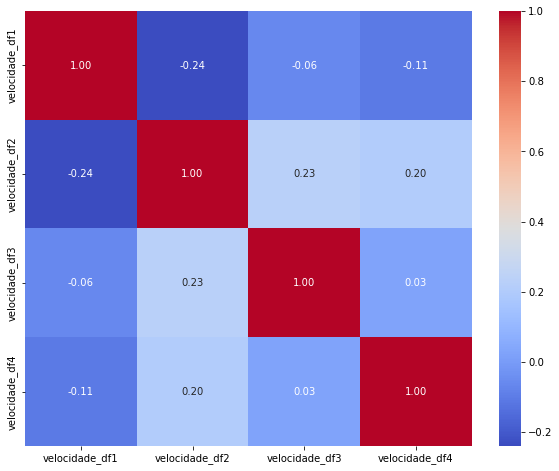

In [12]:
# DataFrame
df = df_concatenado

# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Plota um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [17]:
# Obtém estatísticas descritivas
df.describe()

,velocidade_df1,velocidade_df2,velocidade_df3,velocidade_df4
count,15.000000,15.000000,15.000000,15.000000
mean,3.455651,6.447010,7.717204,4.417106
std,3.593665,5.520037,5.176265,4.837856
min,0.000000,0.000000,0.014385,0.000000
25%,0.677305,2.454995,3.953718,0.777036
50%,2.898226,5.562692,7.825504,1.448226
75%,5.630191,11.325764,10.246989,8.404241
max,10.881867,18.859568,15.855485,13.074188


## 1.2 Método do cotovelo (Elbow Method)
''' Será utilizada essa técnica para encontrar o número ideal de clusters para aplicação do algoritmo de agrupamento! '''

In [18]:
# Importando bibliotecas necessarias para aplicação do metodo e visualização
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
# Lista para armazenar as distorções (soma dos quadrados intra-cluster) para cada número de clusters
distortions = []

# Número máximo de clusters que você deseja testar
max_clusters = 4

# Iterando sobre diferentes números de clusters e calculando as distorções
for i in range(1, max_clusters + 1):
    kmeans_colunas = KMeans(n_clusters=i, random_state=42)
    kmeans_colunas.fit(df_transposto)
    distortions.append(kmeans_colunas.inertia_)

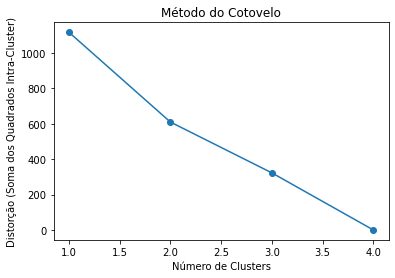

In [20]:
# Plotando o gráfico do método do cotovelo
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção (Soma dos Quadrados Intra-Cluster)')
plt.show()

In [21]:
''' O ponto ideal é onde ocorre uma distorção onde (inertia) começa a diminuir mais lentamente "Que forma um cotovelo" no gráfico'''

' O ponto ideal é onde ocorre uma distorção onde (inertia) começa a diminuir mais lentamente "Que forma um cotovelo" no gráfico'

# 2.0 Aplicação do algoritimo de agrupamento (k-means)

In [22]:
# Importando da biblioteca funções da biblioteca necessária
from sklearn.preprocessing import StandardScaler
import threadpoolctl

In [23]:
# Numero de clusters (k)
k = 2 # Parametro de numeros de clusters que é necessário determinar o mais adequado!

In [24]:
''' Olhar no grafico do Método do cotovelo o k mais ajustado! '''

' Olhar no grafico do Método do cotovelo o k mais ajustado! '

In [25]:
# Aplicando o algoritimo (k-means)
kmeans = KMeans(n_clusters=k, random_state=42)
labels_colunas = kmeans_colunas.fit_predict(df_transposto)

In [26]:
# Adicionando rótulos de cluster aos dados originais
df_transposto['cluster'] = labels_colunas

In [27]:
df_resultado = df_transposto.T

In [28]:
# Exibindo reultado 
df_resultado

,velocidade_df1,velocidade_df2,velocidade_df3,velocidade_df4
1,4.845798,5.887912,7.342302,5.896389
2,0.641539,0.583193,2.827034,1.335808
3,0.000000,0.000000,14.444613,0.000000
4,2.898226,5.562692,15.855485,0.000000
5,9.841014,11.995305,15.713880,2.029584
6,6.829941,3.373768,5.080403,13.074188
7,0.998620,2.046520,9.501105,9.293802
8,0.005542,11.720714,7.825504,11.700247
9,3.332143,3.455970,0.014385,1.448226
10,10.881867,0.412006,0.706782,0.652987


In [29]:
''' ÚLTIMA LINHA SÃO OS CLUSTERS IDENTIFICADOS! '''

' ÚLTIMA LINHA SÃO OS CLUSTERS IDENTIFICADOS! '

## 2.1 Visualização dos clusters identificados

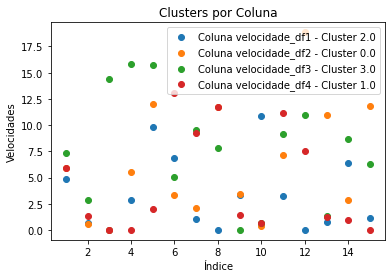

In [30]:
# Visualização dos clusters
# Removendo a última linha que contém os rótulos de cluster para visualização
df_resultado_sem_clusters = df_resultado.iloc[:-1]

# Obtendo os rótulos de cluster da última linha
rótulos_cluster = df_resultado.iloc[-1, :]

# Iterando sobre cada coluna, plotando e identificando pelo número do cluster
for coluna in df_resultado_sem_clusters.columns:
    plt.scatter(df_resultado_sem_clusters.index, df_resultado_sem_clusters[coluna], label=f'Coluna {coluna} - Cluster {rótulos_cluster[coluna]}')

plt.title('Clusters por Coluna')
plt.xlabel('Índice')
plt.ylabel('Velocidades')
plt.legend()
plt.show()

# ---------------------------------------------------------------------